<a href="https://colab.research.google.com/github/FreyFlyy/python-projects/blob/main/Queens_NYC_air_pollution_over_the_years_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program is made to analyse **Average Annual Pollution** over the years in **NYC, Queens**

We'll first import some important libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from datetime import datetime

Then we'll clean up the data, getting **"Data value"** over the years

In [ ]:
df = pd.read_csv("updated_air_quality_data.csv")
data_values = []

for i in range(len(df)):
    if (df["Geo Place Name"].iloc[i] == "Queens") and (df["Time Period"].iloc[i] == "Annual Average"):
        data_values.append((df['Data Value'].iloc[i], df['Start_Date'].iloc[i]))

Then we'll **sort** the data by date, starting from 2005 to 2021

In [ ]:
data_sorted = sorted(data_values, key=lambda x: datetime.strptime(x[1], "%Y-%m-%d"))

And we'll **plot** it on a **scatter graph**

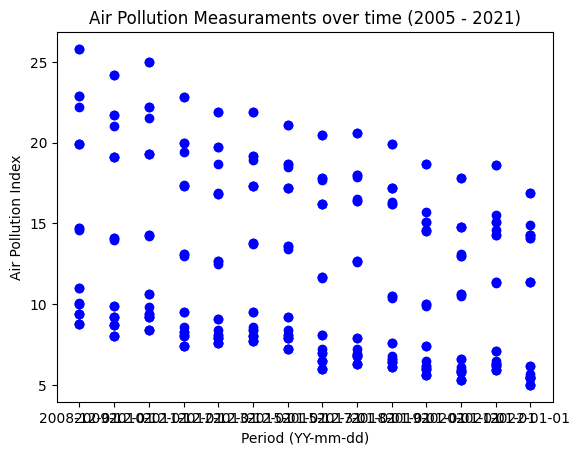

In [ ]:
x = [i[1] for i in data_sorted]
y = [i[0] for i in data_sorted]

plt.scatter(x, y, color="blue")
plt.title("Air Pollution Measuraments over time (2005 - 2021)")
plt.ylabel("Air Pollution Index")
plt.xlabel("Period (YY-mm-dd)")
plt.show()

There are **many measurements** for each period. Given that the distribution is **homogeneous** enough, we can use the **mean** to find a **close value** that reflects reality.

*The median would be a **worse choice** in this case because, with a **limited number of data points** per period, it could lead to an **inaccurate representation** of the data's central tendency*


*(also, we'll start using a yearly based, more readable, X axis)*

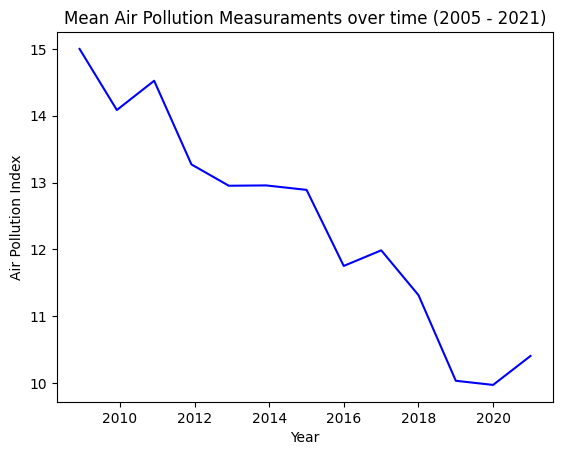

In [ ]:
#TEMP VARIABLES
y_same_period = []
x_same_period = ""
count = 0

start_date = datetime(2008, 1, 1)
new_x = []
new_y = []
new_x_years = []


for i in range(len(x)): #same as len(y)
    if (i != 0) and (x[i] == x[i-1]):
        y_same_period.append(y[i])
        count += 1
    elif (i != 0) and (x[i] != x[i-1]):
        new_x.append(x_same_period)
        x_same_period = x[i]
        new_y.append(sum(y_same_period)/count)
        y_same_period = []
        count = 0
    elif (i == 0):
        x_same_period = x[0]
        y_same_period.append(y[0])
        count += 1

for i in new_x:
    date_obj = datetime.strptime(i, "%Y-%m-%d")
    delta = date_obj - start_date
    new_x_years.append(2008+delta.days/365.25)

plt.plot(new_x_years, new_y, color="blue")
plt.title("Mean Air Pollution Measuraments over time (2005 - 2021)")
plt.ylabel("Air Pollution Index")
plt.xlabel("Year")
plt.show()

We can now take a **regression** on this dataset *(**linear** regression)* to better capture the essence of the **trend**, while also calculating some important **factors** that will help getting to a **conclusion**


Data from the regression:

m = -0.409
q = 835.688
R² = 0.939
r (pearson correlation) = -0.969
p-value = 0.0000000483




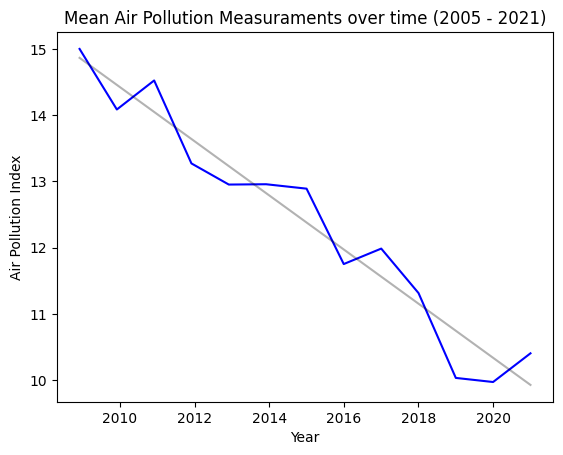

In [ ]:
#DATA PREP
new_x_2d = []
for i in new_x_years:
    new_x_2d.append([i])



model = LinearRegression()
model.fit(new_x_2d, new_y)

m = model.coef_[0]
q = model.intercept_
r2 = model.score(new_x_2d, new_y)
r, p_val = pearsonr(new_x_years, new_y)

print(f"\nData from the regression:\n\nm = {round(m, 3)}\nq = {round(q, 3)}\nR² = {round(r2, 3)}\nr (pearson correlation) = {round(r, 3)}\np-value = {p_val:.10f}\n\n")

plt.plot(new_x_2d, new_y, color="blue")
plt.plot([new_x_2d[0][0], new_x_2d[-1][0]], [new_x_2d[0][0]*m + q, new_x_2d[-1][0]*m + q], color="black", alpha=0.3)
plt.title("Mean Air Pollution Measuraments over time (2005 - 2021)")
plt.ylabel("Air Pollution Index")
plt.xlabel("Year")
plt.show()


We see clear results:

* **R²** is **0.939**, and it indicates that this is a really good model for the data
* **r** (pearson correlation) is **0.969**, and it indicates that the negative correlation between pollution and years passing is very strong, almost perfect
* **p-value** is **4.8e-08**, so small that it is almost impossible to prove a null hypotesis *(0.0000048% that there's no correlation and it's "just luck")*
* **m** and **q** then show what this representation means, and it signifies that, over these years, the **Air Pollution Index** decreased by **0.409** every year *(this is not a clear sign of future decrease, noone can predict the future with 100% certainty)*

*(**R²**, **r** and **m** are rounded to the 3rd decimal place)*

But to better understand the situation, we did **approximations** on the **measuraments each period**, resulting in an inevitable **percentage of error**

We can calculate the **standard deviation** for each period from the **Average Pollution Index** previously calculated

In [ ]:
#Remember that x and y are the scatter points's coordinates

#TEMP VARIABLES
y_same_period = []
x_same_period = ""
count = 0

dev_standards = []
averages = []



for i in range(len(x)): #same as len(y)
    if (i == len(x)-1):
        dev_standards.append(np.std(y_same_period))
        averages.append(sum(y_same_period)/count)
        y_same_period = []
        count = 0
    if (i != 0) and (x[i] == x[i-1]):
        y_same_period.append(y[i])
        count += 1
    elif ((i != 0) and (x[i] != x[i-1])):
        dev_standards.append(np.std(y_same_period))
        averages.append(sum(y_same_period)/count)
        y_same_period = []
        count = 0
    elif (i == 0):
        x_same_period = x[0]
        y_same_period.append(y[0])
        count += 1

for i in range(len(dev_standards)): #same as len(averages)
    print(f"Year {2008+i} / dev.st = {round(dev_standards[i], 3)} / average = {round(averages[i], 3)} / CV = {round(dev_standards[i]/averages[i]*100, 1)}%")

Year 2008 / dev.st = 6.022 / average = 15.0 / CV = 40.1%
Year 2009 / dev.st = 5.97 / average = 14.086 / CV = 42.4%
Year 2010 / dev.st = 6.007 / average = 14.524 / CV = 41.4%
Year 2011 / dev.st = 5.42 / average = 13.271 / CV = 40.8%
Year 2012 / dev.st = 5.169 / average = 12.952 / CV = 39.9%
Year 2013 / dev.st = 5.22 / average = 12.957 / CV = 40.3%
Year 2014 / dev.st = 5.028 / average = 12.89 / CV = 39.0%
Year 2015 / dev.st = 5.175 / average = 11.752 / CV = 44.0%
Year 2016 / dev.st = 5.234 / average = 11.986 / CV = 43.7%
Year 2017 / dev.st = 5.119 / average = 11.314 / CV = 45.2%
Year 2018 / dev.st = 4.562 / average = 10.033 / CV = 45.5%
Year 2019 / dev.st = 4.325 / average = 9.971 / CV = 43.4%
Year 2020 / dev.st = 4.567 / average = 10.405 / CV = 43.9%
Year 2021 / dev.st = 4.244 / average = 9.155 / CV = 46.4%


We see that the **Coefficent of Variation** (**CV**, dev.st / avg) is pretty high at about 40%, meaning:


* Either instruments used were **very imprecise** and not capable of returning the correct value repeatedly *(unlikely)*

**OR**

* Because **Queens** is a large area, its **Air Pollution varies significantly** from region to region (more likely)

So, we can conclude that **Air Pollution** was in fact **decreasing** in the area of Queens, NYC *(great 😊)* from **2008 to 2021** at a rate of about **0.4 units per year**

But we **cannot conclude** whether there's **high variability** from region to region or **measurements** were **imprecise**: *further research is needed*

**My bests regards**

Scolz F.